In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, classification_report

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('stroke_prediction.csv')
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42,0,0,1,3,0,216.38,34.5,0,0


# Column names and descriptions

In [ ]:
'''
sex-patient's gender (1: male; 0: female)
age-patient's age (in years)
hypertension-patient has ever had hypertension (1) or not (0)
heart_disease- patient has ever had heart_disease(1) or not (0)
ever_married-patient married (1) or not (0)
work_type-patient job type: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private
Residence_type-patient area: 1 - Urban, 0 - Rural
avg_glucose_level-patient average blood sugar level
bmi-Body Mass Index
smoking_status-1 - smokes, 0 - never smoked
stroke- stroke yes or no
'''

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  int64  
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.4 MB


In [5]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df['sex'].value_counts()

1.0    22710
0.0    18197
Name: sex, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

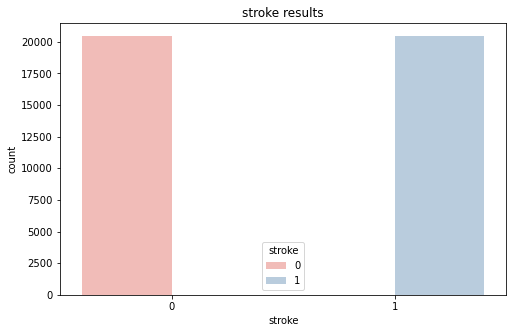

In [9]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="stroke", data = df, hue ="stroke", palette ="Pastel1")
plt.title("stroke results")
plt.show()

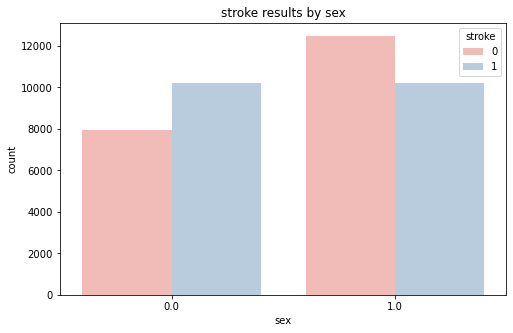

In [10]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="sex", data = df, hue ="stroke", palette ="Pastel1" )
plt.title("stroke results by sex")
plt.show()

# Checking for outliers

<AxesSubplot:xlabel='stroke'>

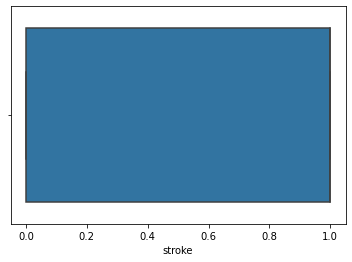

In [11]:
sns.boxplot(data= df,x = "stroke")

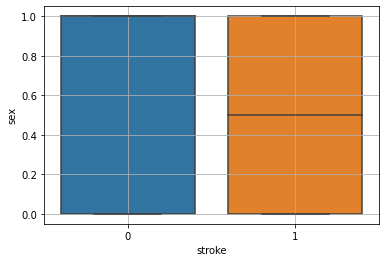

In [12]:
sns.boxplot(data= df,x = "stroke" , y = "sex")
plt.grid()

# Separate the columns into x & y

In [13]:
x = df.iloc[:,:-1]
x

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63,0,1,1,4,1,228.69,36.6,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0
2,0.0,61,0,0,1,4,1,171.23,34.4,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0
4,1.0,85,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38,0,0,0,4,1,120.94,29.7,1
40906,0.0,53,0,0,1,4,0,77.66,40.8,0
40907,1.0,32,0,0,1,2,0,231.95,33.2,0
40908,1.0,42,0,0,1,3,0,216.38,34.5,0


In [14]:
y = df.iloc[:,-1]
y

0        1
1        1
2        1
3        1
4        1
        ..
40905    0
40906    0
40907    0
40908    0
40909    0
Name: stroke, Length: 40907, dtype: int64

# Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

# 1 - Predicting the data using Logistics Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [17]:
### Evaluate the model

In [18]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.67941823515033
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      4071
           1       0.71      0.61      0.66      4111

    accuracy                           0.68      8182
   macro avg       0.68      0.68      0.68      8182
weighted avg       0.68      0.68      0.68      8182



#### We have achieved an Average Accuracy of 67 % which is not that good. Lets see if we can increase this accuracy by hyper tuning

# HPT - Hyper Parameter Tuning

In [19]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [20]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.6834514788560254
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      4071
           1       0.71      0.62      0.66      4111

    accuracy                           0.68      8182
   macro avg       0.69      0.68      0.68      8182
weighted avg       0.69      0.68      0.68      8182



#### By using liblinear we get Accuracy of 68%

In [21]:
logreg = LogisticRegression(solver = 'saga')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [22]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.6773405035443657
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      4071
           1       0.70      0.62      0.66      4111

    accuracy                           0.68      8182
   macro avg       0.68      0.68      0.68      8182
weighted avg       0.68      0.68      0.68      8182



#### By using saga we get Accuracy of 67%

# 2 - Predicting the data using Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [24]:
dt = DecisionTreeClassifier()

In [25]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

In [26]:
mymodel(dt)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4071
           1       1.00      1.00      1.00      4111

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



DecisionTreeClassifier()

#### By using Decision Tree we get Accuracy of 1.0%

In [27]:
dt.score(xtrain,ytrain)

1.0

In [28]:
dt.score(xtest,ytest)

1.0

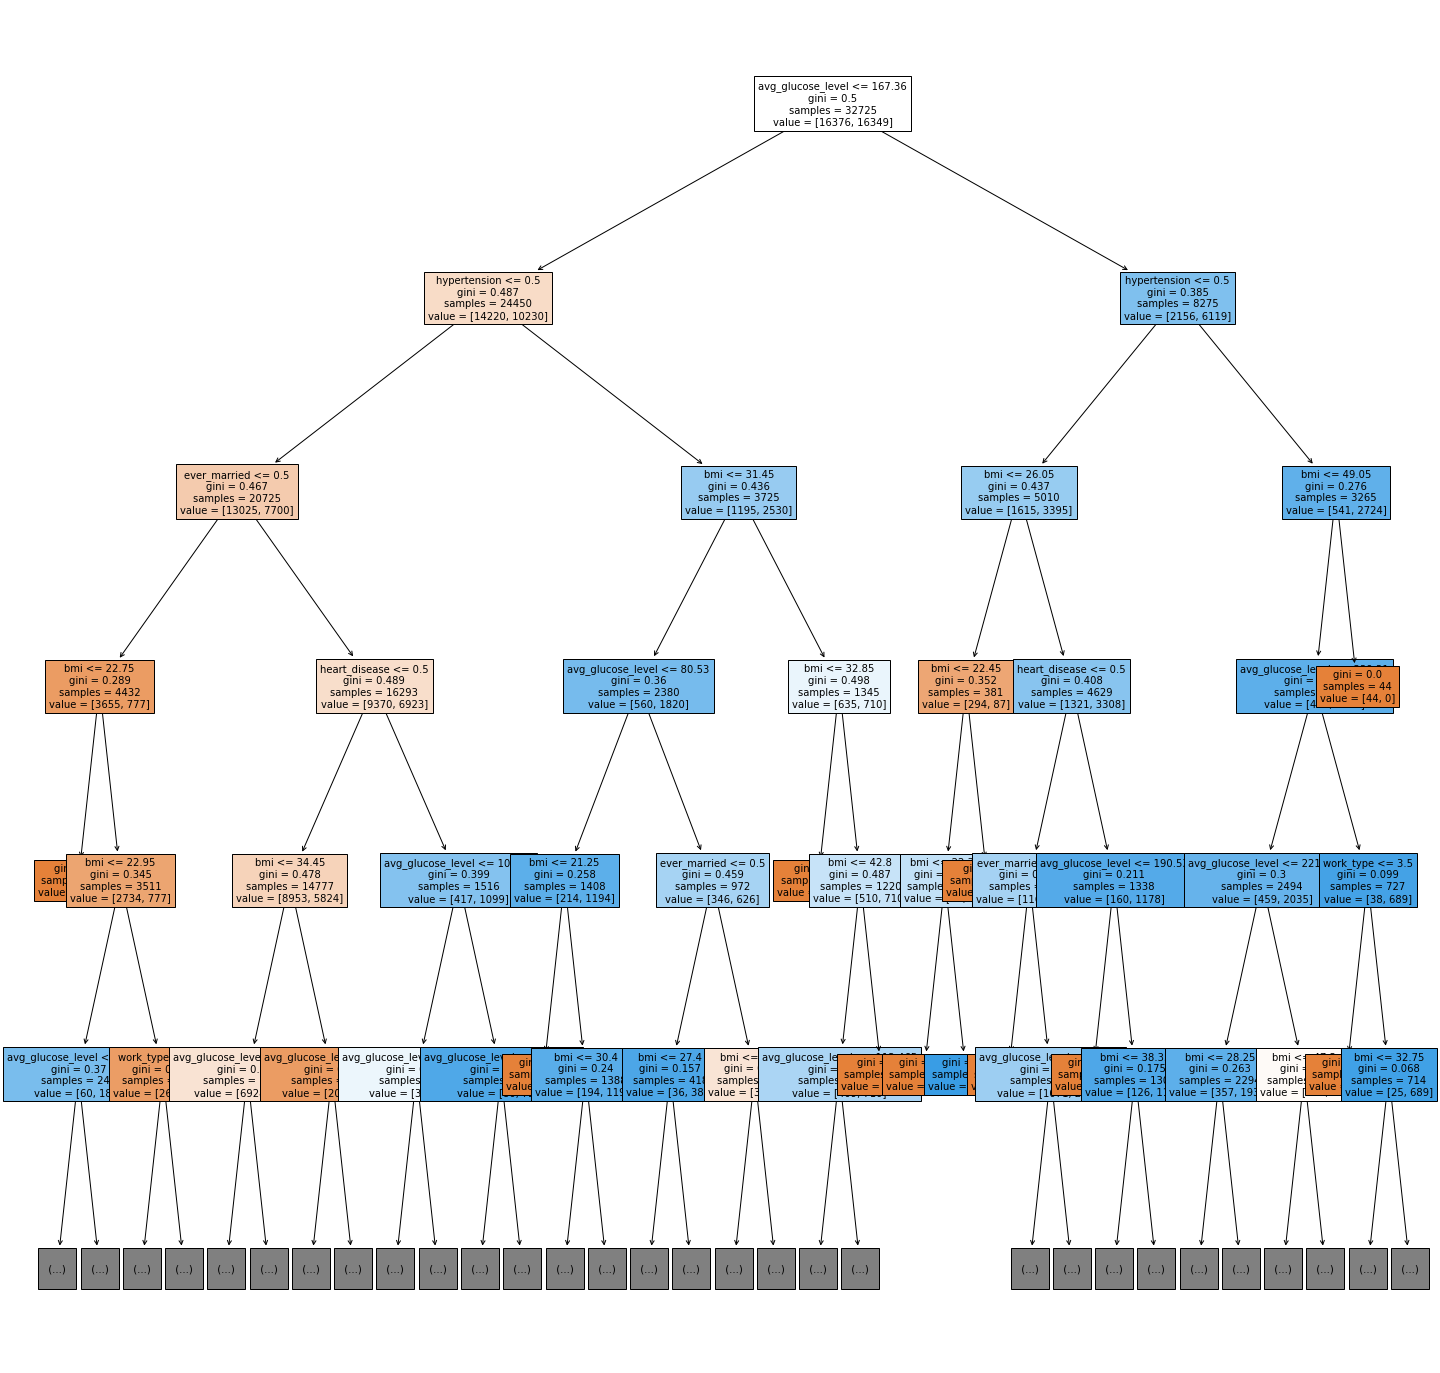

In [29]:
fig,ax=plt.subplots(figsize=(25,25))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig('abc.jpg')

In [30]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 1.0


#### both training and testing accuracies are high

#### overfitting

# Hypertunning DT

## i - max_depth

In [31]:
for i in range(20,35):
    dt1=DecisionTreeClassifier(max_depth=i)     # this object will change evertime
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    print(f'max_depth={i} accuracy_score={ac}')

max_depth=20 accuracy_score=0.9918112930823759
max_depth=21 accuracy_score=0.9954778782693718
max_depth=22 accuracy_score=0.9975556098753361
max_depth=23 accuracy_score=0.999388902468834
max_depth=24 accuracy_score=0.9996333414813005
max_depth=25 accuracy_score=0.9996333414813005
max_depth=26 accuracy_score=1.0
max_depth=27 accuracy_score=1.0
max_depth=28 accuracy_score=1.0
max_depth=29 accuracy_score=1.0
max_depth=30 accuracy_score=1.0
max_depth=31 accuracy_score=1.0
max_depth=32 accuracy_score=1.0
max_depth=33 accuracy_score=1.0
max_depth=34 accuracy_score=1.0


In [32]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.9996333414813005
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4071
           1       1.00      1.00      1.00      4111

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



DecisionTreeClassifier(max_depth=24)

#### By using Decision Tree Max Depth function we achive the accuracy of 99%

In [33]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9994805194805195 
 test score : 0.9996333414813005


## ii - min_samples_split

In [34]:
for i in range(90,110):
    dt3 = DecisionTreeClassifier(min_samples_split = i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"min_samples_split = {i} accuracy : {ac}")

min_samples_split = 90 accuracy : 0.997433390369103
min_samples_split = 91 accuracy : 0.9970667318504033
min_samples_split = 92 accuracy : 0.9967000733317037
min_samples_split = 93 accuracy : 0.9959667562943045
min_samples_split = 94 accuracy : 0.9957223172818381
min_samples_split = 95 accuracy : 0.9954778782693718
min_samples_split = 96 accuracy : 0.9954778782693718
min_samples_split = 97 accuracy : 0.9945001222195062
min_samples_split = 98 accuracy : 0.9945001222195062
min_samples_split = 99 accuracy : 0.9942556832070398
min_samples_split = 100 accuracy : 0.9940112441945734
min_samples_split = 101 accuracy : 0.993766805182107
min_samples_split = 102 accuracy : 0.9934001466634075
min_samples_split = 103 accuracy : 0.9934001466634075
min_samples_split = 104 accuracy : 0.9927890491322415
min_samples_split = 105 accuracy : 0.9921779516010756
min_samples_split = 106 accuracy : 0.9909557565387436
min_samples_split = 107 accuracy : 0.9909557565387436
min_samples_split = 108 accuracy : 0.990

In [35]:
dt4=DecisionTreeClassifier(min_samples_split=92)
mymodel(dt4)

0.9967000733317037
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4071
           1       0.99      1.00      1.00      4111

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



DecisionTreeClassifier(min_samples_split=92)

In [36]:
train=dt4.score(xtrain,ytrain)
test=dt4.score(xtest,ytest)
print(f"train score :{train}\n test score :{test}")

train score :0.9957830404889229
 test score :0.9967000733317037


#### By using Decision Tree Min Sample Split function we achive the accuracy of 99%

## iii - min_samples_leaf

In [37]:
for i in range(30,50):
    dt5=DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_leaf ={i}accuracy :{ac}")

min_samples_leaf =30accuracy :0.9706673185040332
min_samples_leaf =31accuracy :0.9684673673918357
min_samples_leaf =32accuracy :0.9668785138108043
min_samples_leaf =33accuracy :0.9662674162796382
min_samples_leaf =34accuracy :0.9662674162796382
min_samples_leaf =35accuracy :0.9640674651674407
min_samples_leaf =36accuracy :0.9619897335614764
min_samples_leaf =37accuracy :0.9619897335614764
min_samples_leaf =38accuracy :0.9590564654118797
min_samples_leaf =39accuracy :0.9601564409679785
min_samples_leaf =40accuracy :0.9599120019555121
min_samples_leaf =41accuracy :0.9606453189929113
min_samples_leaf =42accuracy :0.9610119775116108
min_samples_leaf =43accuracy :0.9610119775116108
min_samples_leaf =44accuracy :0.9610119775116108
min_samples_leaf =45accuracy :0.9593009044243461
min_samples_leaf =46accuracy :0.9558787582498167
min_samples_leaf =47accuracy :0.9540454656563188
min_samples_leaf =48accuracy :0.9495233439256905
min_samples_leaf =49accuracy :0.9476900513321926


In [38]:
dt6=DecisionTreeClassifier(min_samples_leaf=44)
mymodel(dt6)

0.9610119775116108
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4071
           1       0.93      1.00      0.96      4111

    accuracy                           0.96      8182
   macro avg       0.96      0.96      0.96      8182
weighted avg       0.96      0.96      0.96      8182



DecisionTreeClassifier(min_samples_leaf=44)

In [39]:
train=dt6.score(xtrain,ytrain)
test=dt6.score(xtest,ytest)
print(f"train score :{train}\n test score :{test}")

train score :0.9605805958747136
 test score :0.9610119775116108


#### By using Decision Tree min_samples_leaf function we achive the accuracy of 96%

# 3 - Predicting the data using Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred=rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4071
           1       1.00      1.00      1.00      4111

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



#### By using Random Forest we get 1.0% of accuracy.

#### overfitting

# 4. Predicting the data using Boosting

## i - Adaboost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      4071
           1       0.75      0.67      0.70      4111

    accuracy                           0.72      8182
   macro avg       0.72      0.72      0.72      8182
weighted avg       0.72      0.72      0.72      8182



#### By using AdaBoost Classifier we get 72% of accuracy

## ii - Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4071
           1       0.81      0.79      0.80      4111

    accuracy                           0.81      8182
   macro avg       0.81      0.81      0.81      8182
weighted avg       0.81      0.81      0.81      8182



#### By using Gradient Boosting algorithm we get 81% of accuracy

## iii - XG Boosting

In [43]:
pip install xgboost    # to install extreme boost

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [44]:
from xgboost import XGBClassifier

In [45]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4071
           1       0.99      1.00      1.00      4111

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



# 5. Predicting the data using Encemble Learning

## i - Bagging

In [46]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      4071
           1       0.71      0.61      0.66      4111

    accuracy                           0.68      8182
   macro avg       0.68      0.68      0.68      8182
weighted avg       0.69      0.68      0.68      8182



In [47]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4071
           1       1.00      1.00      1.00      4111

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182



In [48]:
models=[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

#### By using Bagging Classifier on Logostic Regression we get 68% of accuracy which is not good for prediction

In [49]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=models)                        # estimators --> model name
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      4071
           1       1.00      0.61      0.76      4111

    accuracy                           0.81      8182
   macro avg       0.86      0.81      0.80      8182
weighted avg       0.86      0.81      0.80      8182



In [50]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=models,voting='hard')                   # estimators --> model na
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      4071
           1       1.00      0.61      0.76      4111

    accuracy                           0.81      8182
   macro avg       0.86      0.81      0.80      8182
weighted avg       0.86      0.81      0.80      8182



#### By using Voting Classifier we get 80% And 81% of of accuracy

# Conclusion


## Based on the above accuracy scores, we should go ahead with Decision tree ,gradient boosting, Encemble Learning.